In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

In [5]:

single_image= X_train[0]



In [6]:
single_image.shape

(28, 28)

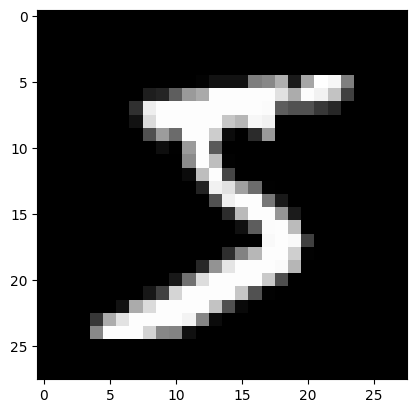

In [7]:

plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:

X_train.min()

0

In [10]:
X_train.max()


255

In [11]:

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [13]:
y_train[0]

5

In [14]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [15]:
type(y_train_onehot)

numpy.ndarray

In [16]:
y_train_onehot.shape

(60000, 10)

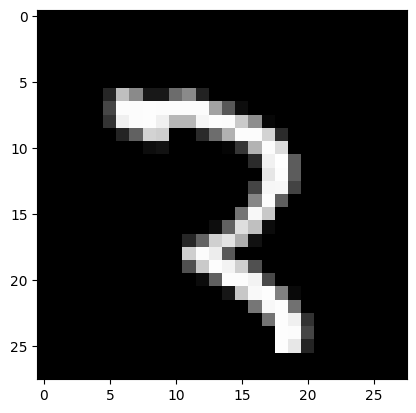

In [17]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [18]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [19]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [20]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [41]:
print("Name : Shobika")
print("Reg No : 212221230096")
model.summary()

Name : Shobika
Reg No : 212221230096


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         247,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 800,960 (3.06 MB)

 Trainable params: 266,986 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 533,974 (2.04 MB)

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [23]:

model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 65ms/step - accuracy: 0.8871 - loss: 0.3635 - val_accuracy: 0.9840 - val_loss: 0.0523
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 89ms/step - accuracy: 0.9827 - loss: 0.0569 - val_accuracy: 0.9883 - val_loss: 0.0378
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 109s 54ms/step - accuracy: 0.9900 - loss: 0.0340 - val_accuracy: 0.9876 - val_loss: 0.0388
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 58ms/step - accuracy: 0.9914 - loss: 0.0266 - val_accuracy: 0.9892 - val_loss: 0.0346
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 55ms/step - accuracy: 0.9938 - loss: 0.0196 - val_accuracy: 0.9882 - val_loss: 0.0392


In [24]:
metrics = pd.DataFrame(model.history.history)

In [42]:
print("Name : Shobika")
print("Reg No : 212221230096")
metrics.head()

Name : Shobika
Reg No : 212221230096


,accuracy,loss,val_accuracy,val_loss
0,0.949033,0.169498,0.9840,0.052259
1,0.984067,0.052538,0.9883,0.037766
2,0.988917,0.036108,0.9876,0.038819
3,0.991467,0.026422,0.9892,0.034619
4,0.993217,0.020791,0.9882,0.039190


Name : Shobika
Reg No : 212221230096


<Axes: >

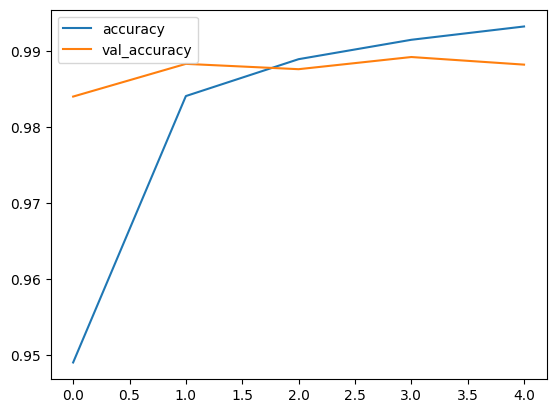

In [43]:
print("Name : Shobika")
print("Reg No : 212221230096")
metrics[['accuracy','val_accuracy']].plot()

Name : Shobika
Reg No : 212221230096


<Axes: >

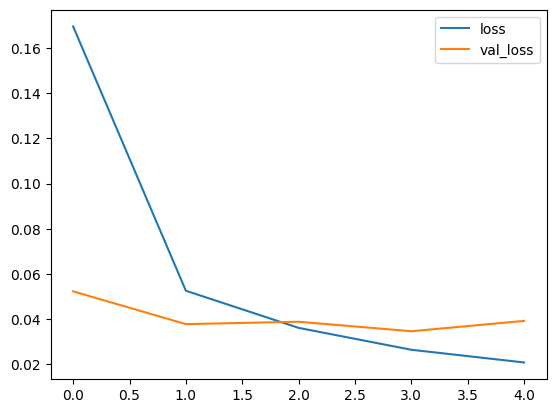

In [44]:
print("Name : Shobika")
print("Reg No : 212221230096")
metrics[['loss','val_loss']].plot()

In [28]:

x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [45]:
print("Name : Shobika")
print("Reg No : 212221230096")

print(confusion_matrix(y_test,x_test_predictions))



Name : Shobika
Reg No : 212221230096
[[ 978    1    0    1    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    6 1018    1    1    0    0    4    1    0]
 [   0    1    1 1005    0    2    0    0    1    0]
 [   0    0    0    0  978    0    1    0    0    3]
 [   0    0    0    7    0  882    2    0    1    0]
 [   2    4    0    0    2    2  948    0    0    0]
 [   0   13    4    0    0    0    0 1010    1    0]
 [   5    2    4    1    6    1    0    2  949    4]
 [   5    3    0    2   12    1    0    6    1  979]]


In [46]:
print("Name : Shobika")
print("Reg No : 212221230096")
print(classification_report(y_test,x_test_predictions))

Name : Shobika
Reg No : 212221230096
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.97      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [31]:
img = image.load_img('grey.jpg')

In [32]:
type(img)

PIL.WebPImagePlugin.WebPImageFile

In [33]:

img = image.load_img('grey.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [34]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [35]:
print(x_single_prediction)

[0]


Name : Shobika
Reg No : 212221230096


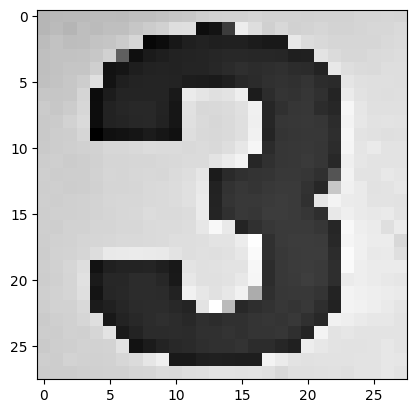

In [40]:
print("Name : Shobika")
print("Reg No : 212221230096")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [37]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [38]:

x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [39]:

print(x_single_prediction)

[3]
